In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
df = pd.read_csv("Retail_Sales_Data/Merged_Sales_Stores.csv")

In [39]:
df


,store,dept,sale_date,weekly_sales,size
0,1,99,2012-12-10,80.00,151315
1,1,99,2012-05-10,635.00,151315
2,1,99,2012-09-14,0.03,151315
3,1,99,2012-07-09,0.05,151315
4,1,99,2012-08-31,20.06,151315
...,...,...,...,...,...
421565,44,1,2010-05-03,6120.60,39910
421566,44,1,2010-02-26,6014.71,39910
421567,44,1,2010-02-19,7751.11,39910
421568,44,1,2010-12-02,12315.65,39910


In [43]:
df_1= df[df["store"]== 1].dropna()


In [44]:
df_1

,store,dept,sale_date,weekly_sales,size
0,1,99,2012-12-10,80.00,151315
1,1,99,2012-05-10,635.00,151315
2,1,99,2012-09-14,0.03,151315
3,1,99,2012-07-09,0.05,151315
4,1,99,2012-08-31,20.06,151315
...,...,...,...,...,...
10239,1,1,2010-05-03,21827.90,151315
10240,1,1,2010-02-26,19403.54,151315
10241,1,1,2010-02-19,41595.55,151315
10242,1,1,2010-12-02,46039.49,151315


In [31]:
df_copy = df

In [65]:
df_for_analysis["Total_Sales"] = pd.DataFrame(df.groupby("store")["weekly_sales"].sum())

In [66]:
df_for_analysis["size"] = pd.DataFrame(df.groupby("store")["size"].mean())

In [70]:
df_for_analysis.drop(inplace = True, columns = ["weekly_sales", "Total Sales"])

In [71]:
df_for_analysis

,size,Total_Sales
store,,
1,151315,2.224028e+08
2,202307,2.753824e+08
3,37392,5.758674e+07
4,205863,2.995440e+08
5,34875,4.547569e+07
6,202505,2.237561e+08
7,70713,8.159828e+07
8,155078,1.299512e+08
9,125833,7.778922e+07


In [72]:

X = df_for_analysis["size"].values.reshape(-1, 1)
y= df_for_analysis["Total_Sales"].values.reshape(-1, 1)

print(x.shape, y.shape)

(45, 1) (45, 1)


In [73]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [74]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [75]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6537732771096021
Testing Score: 0.7949545308009552


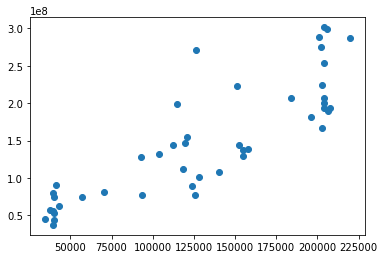

In [76]:
plt.scatter(x,y)

Text(0.5, 1.0, 'Residual Plot')

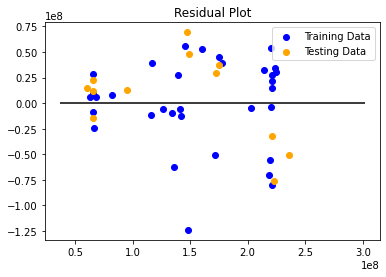

In [77]:
 # Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION